###  Introduction to the object oriented Pattern syntax.


In [1]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
# import and utilities

from biopax_explorer.pattern.pattern import PatternExecutor, Pattern
from biopax_explorer.query import  EntityNode
from biopax_explorer.biopax import *
import json

   

In [3]:
from biopax_explorer.pattern.view import writePatternGraphView
from IPython.display import Image

#### Generating a Query from a Pattern construct using the BIOPAX model  Entities

##### We construct a pattern and display its graphical representation

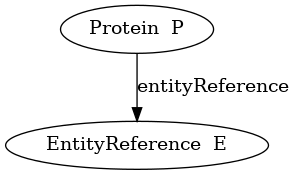

In [19]:
p=Pattern()    
prot = EntityNode("P", Protein())
prot.whereAttribute("displayName", "ADPGK","CONTAINS")
entityReference=EntityNode("E", EntityReference())
prot.connectedWith(entityReference, "entityReference")
p.define(prot,entityReference)



#select * from e, p where 

img="data/output/test_pattern_view.svg"
writePatternGraphView(p,img,"svg")

img="data/output/test_pattern_view.png"
writePatternGraphView(p,img)
Image(img)


 


##### from a file

In [20]:


pe=PatternExecutor()
pe.datasetFile("data/input/export_all_g6p.xml") 
 
# executePattern returns minimal information by instance (PK class), for memory and query speed optimization
result = pe.executePattern(p)
firstresult = result[:10]
print("""#--------glucokinase related proteins in the dataset----------""")

print("""#--------uris (identifiers)----------""")
 
for entity_row in firstresult:
  for entity in entity_row:
    if entity.meta_label in ['P']:
        print(entity.pk)



#--------glucokinase related proteins in the dataset----------
#--------uris (identifiers)----------
http://www.reactome.org/biopax/56/71387#Protein186


##### from a  SPARQL enpoint local or remote (fuseki)

In [31]:



print("""
#-------------------------------------------------------------------------------------
a Pattern that represents all Protein 'P' with an  EntityReference 'E'
, 'P' must have a comment  containing  a specific  keyword.
#-------------------------------------------------------------------------------------
""")
p=Pattern()    
prot = EntityNode("P", Protein())
entityReference=EntityNode("E", EntityReference())
prot.connectedWith(entityReference, "entityReference")
prot.whereAttribute("displayName", "FRK","CONTAINS")
p.define(prot,entityReference)



#-------------------------------------------------------------------------------------
a Pattern that represents all Protein 'P' with an  EntityReference 'E'
, 'P' must have a comment  containing  a specific  keyword.
#-------------------------------------------------------------------------------------



In [32]:
datasetN = "netpath"
datasetP = "panther"
db = "http://db:3030" # with local triple store deployed with docker-compose
#db = "https://rdf-ds.genouest.org" # using an online default triple store

 
peN = PatternExecutor(db,datasetN)
peP = PatternExecutor(db,datasetP)

  




 

In [34]:
print("""
#-------------------------------------------------------------------------------------
We query a dataset with the Pattern. The dataset is an RDF dataset stored in a triple store, local or remote.
defined by 2 parameters 'db' (url) and 'dataset'
#-------------------------------------------------------------------------------------
""")
print("""execution""")
peN.maxCount(100) # we limit the result maximum number to avoid overload : good practice  during  Pattern testing 
result = peN.executePattern(p)
firstresult = result[:5]
print("""#------------------""")
i=0
for entity_row in firstresult:
  for entity in entity_row:
    i=i+1 
    print("%s uri:%s" %(i,entity.pk))
    if entity.meta_label in ['P','E']:
       print("   core entity: referenced in Pattern %s" %(type(entity))) 
    else:
       print("   linked entity: neighbour from a core entity %s" %(type(entity))) 
print("""#------------------""")
 



#-------------------------------------------------------------------------------------
We query a dataset with the Pattern. The dataset is an RDF dataset stored in a triple store, local or remote.
defined by 2 parameters 'db' (url) and 'dataset'
#-------------------------------------------------------------------------------------

execution
#------------------
1 uri:http://pathwaycommons.org/pc12/#Protein_fe9aa3569b03eb22514796f21db8dea3
   core entity: referenced in Pattern <class 'rdfobj.mapper.PK'>
2 uri:http://identifiers.org/uniprot/P42685
   core entity: referenced in Pattern <class 'rdfobj.mapper.PK'>
3 uri:http://pathwaycommons.org/pc12/#Protein_e327253efbb4440eb6664fc6e69627c4
   core entity: referenced in Pattern <class 'rdfobj.mapper.PK'>
4 uri:http://identifiers.org/uniprot/P42685
   core entity: referenced in Pattern <class 'rdfobj.mapper.PK'>
#------------------


#### Display the  SPARQL Query used in background

In [35]:
print("""
#-------------------------------------------------------------------------------------
For flexibility and learning, the internal generated SPARQL queries can be displayed-----------------------------------
They can be reused in other context 
""")
querylist=PatternExecutor().queries(p)


for q in querylist:
    print("#---generated sparql query---\n\n")
    print(q)


#-------------------------------------------------------------------------------------
For flexibility and learning, the internal generated SPARQL queries can be displayed-----------------------------------
They can be reused in other context 

#---generated sparql query---


prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix bi: <http://www.biopax.org/release/biopax-level3.owl#>
select ?s2 ?o2 ?entityReferencen0E ?s2__rdft ?o2__rdft
where {
?s2 ?entityReferencen0E ?o2 .
?s2 rdf:type ?s2__rdft .
?o2 rdf:type ?o2__rdft .
{ ?o2 a bi:EntityReference }  UNION  { ?o2 a bi:DnaRegionReference }  UNION  { ?o2 a bi:DnaReference }  UNION  { ?o2 a bi:SmallMoleculeReference }  UNION  { ?o2 a bi:RnaReference }  UNION  { ?o2 a bi:ProteinReference }  UNION  { ?o2 a bi:RnaRegionReference }  .
{ ?s2 bi:displayName ?displayName }.
{ ?s2 a bi:Protein }
FILTER (  ?entityReferencen0E =  bi:entityReference  ) .
FILTER ( CONTAINS(?displayName,'FRK')  ) .
}


In [36]:
#----dev-----------
import importlib
def define_instance_from_name(module,class_name):
   print("==%s define_instance_from_name==%s" %(module,class_name))
 
   if isinstance(module,str):
      module = importlib.import_module(module)

   class_ = getattr(module, class_name)
   instance = class_()
   return instance

def define_module_from_name( module_name):
    module = importlib.import_module(module_name)
    globals()[module] = module

inst=define_instance_from_name("biopax","Catalysis")
print(inst)
#----------

==biopax define_instance_from_name==Catalysis
Catalysis(pk=None, pop_state=None, exhausted=None, meta_label=None, rdf_type=http://www.biopax.org/release/biopax-level3.owl#Catalysis, _dataSource=None, _evidence=None, _xref=None, _availability=None, _displayName=None, _standardName=None, _interactionType=None, _participant=None, _controlled=None, _controller=None, _controlType=None, _cofactor=None, _catalysisDirection=None)


create a pattern with connected entities, get the fully populated entities

In [38]:
p=Pattern()    
controlled = EntityNode("CONTROLLED", Entity())
interaction=EntityNode("CONTROL", Control())
interaction.connectedWith(controlled, "controlled")
p.define(interaction,controlled)   

print("""execution""")
 ##  fetchEntities population real BIOPAX model instances with full attributes and relations
# with max_count,  we limit the result maximum number to avoid overload 
result = peN.fetchEntities(p, level=1, max_count=1) 
 
print("""#------------------""")
i=0

for entity_row in result:
  for entity in entity_row:
    i=i+1 
     # we filter on meta data label (defined during pattern construction , in all EntityNode constructor
     # This feature allow to keep the semanantic , even if there is multiple entities of the same class in the pattern search results
    if entity.meta_label in ['CONTROLLED']:
       print("%s  CONTROLLED entity: referenced in Pattern %s" %(i,type(entity))) 
       print("     uri:%s" %(entity.pk))
       #print("     json: %s" %(entity.to_json())) 
     
    elif entity.meta_label in ['CONTROL']:
       print("%s  CONTROL entity: referenced in Pattern %s" %(i,type(entity))) 
       print("     uri:%s" %(entity.pk))
       #print("     json: %s" %(entity.to_json()))  

      

execution
#------------------
1  CONTROL entity: referenced in Pattern <class 'biopax.catalysis.Catalysis'>
     uri:http://pathwaycommons.org/pc12/#Catalysis_84b80f728dd3f89bea7345778bb4eb94
2  CONTROLLED entity: referenced in Pattern <class 'biopax.biochemicalreaction.BiochemicalReaction'>
     uri:http://pathwaycommons.org/pc12/#BiochemicalReaction_b892991189fbca87ef55e70584793cc0


search an entity by its uri ,   json serialization 

In [48]:
uri="http://pathwaycommons.org/pc12/#Catalysis_84b80f728dd3f89bea7345778bb4eb94"


p=Pattern()    
controlled = EntityNode("CONTROLLED", Entity())
controller = EntityNode("CONTROLLER", Entity())
interaction=EntityNode("CONTROL", Control())
interaction.has_uri(uri)
interaction.connectedWith(controlled, "controlled")
interaction.connectedWith(controller, "controller")
p.define(interaction,controlled,controller)   

print("""execution""")
 

##  fetchEntities population real BIOPAX model instances with full attributes and relations
result = peN.fetchEntities(p, level=1, max_count=10) 
 
print("""#------------------""")
i=0
selected_entity_list=None
for entity_row in result:
  for entity in entity_row:
    i=i+1 
    print("%s uri:%s" %(i,entity.pk))
    if isinstance(entity, Control):
        #print(entity.to_json())
        controller=entity.get_controller()
        if controller!=None:
          for ctrl in controller:
             print("controller:",ctrl.to_json())
             selected_entity_list=controller 



execution
#------------------
1 uri:http://pathwaycommons.org/pc12/#Catalysis_84b80f728dd3f89bea7345778bb4eb94
controller: {
  "uri": "http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14",
  "dataSource": null,
  "evidence": null,
  "xref": null,
  "availability": null,
  "displayName": null,
  "standardName": null,
  "__class__": "Entity"
}
2 uri:http://pathwaycommons.org/pc12/#BiochemicalReaction_b892991189fbca87ef55e70584793cc0
3 uri:http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14


In [49]:
from biopax_explorer.biopax.doc import helper
from biopax_explorer.biopax.utils import gen_utils as gu

search an entity by its uri , use the entity getter  

In [50]:
for selected_entity in selected_entity_list:
  p=Pattern()    
  my_entity = EntityNode("ENTITY", selected_entity)
  my_entity.has_uri(selected_entity.pk)
  p.define(my_entity)   

  print("""execution""")
 
  result = peN.fetchEntities(p, level=1, max_count=10)  
 
  print("""#------------------""")
  i=0
 
  for entity_row in result:
    for entity in entity_row:
      i=i+1 
      print("%s uri:%s" %(i,entity.pk))
      print("")
      print("""#--------attributes using helper and getters----------""") 
      print(entity.get_displayName())  
      print(gu.entityToString(entity,helper)) # utilitary function to display attributes 
      print("""#--------json----------""") 
      print(entity.to_json())
       
           

execution
#------------------
1 uri:http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14

#--------attributes using helper and getters----------
JAK3
  uri/pk: http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14
  class:Protein
  dataSource : (Provenance, http://pathwaycommons.org/pc12/#Provenance_0cfa90c3ddb627e2e7f3af3d5bd9497d) 
  displayName : JAK3 
  entityReference : [<biopax.entityreference.EntityReference object at 0x7fc5ab741e50>] 

#--------json----------
{
  "uri": "http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14",
  "dataSource": {
    "__uri__": "http://pathwaycommons.org/pc12/#Provenance_0cfa90c3ddb627e2e7f3af3d5bd9497d",
    "comment": null,
    "xref": null,
    "displayName": null,
    "name": null,
    "standardName": null
  },
  "evidence": null,
  "xref": null,
  "availability": null,
  "displayName": "JAK3",
  "standardName": null,
  "cellularLocation": null,
  "feature": null,
  "memberPhysicalEntit